# Starling Fraud DS Task  

## Intro  
You are the first person with access to this data and as such are tasked with completing some **exploratory analysis and data visualisation** before creating a model to **predict the winner of the race**  

This piece of work represents some **adhoc analysis and a first draft** model attempt. The idea is to discuss some of your analysis and output in our discussion so the aim of this exercise is more to **facilitate our discussion** than to produce a perfect set of results. As such, please do not spend more than 90 minutes in total on these tasks. 

The output of this work will need to be understood by other data scientists and should be useful for any future projects using this data. As such, please provide appropriate annotations/commentary so that the work can be easily followed. 

You are free to use any tools at your disposal for these tasks but it will need to be reproducible by us in order to assess it. Ideally the model would be in the form of a python/R notebook but if you would prefer to use other tools or link to any other open source data, please do so.

## Libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar as cal

In [4]:
pd.options.display.float_format = '{:.4f}'.format

In [5]:
%load_ext pycodestyle_magic
%pycodestyle_on

## Task 1 Data Visualisation:  
(45 Minutes Max)

Consider the best way to visualise this data. 

1) Create some key components that may be used within a data visualisation dashboard to present your analysis to other data scientists and/or a wider audience.  
2) As you explore the data, please note down any questions or concerns that come to mind, along with any insights and conclusions that you are able to draw using the visualisation components that you have built.


### Get Data

In [6]:
data_path = "../data/raw/Horses.csv"
df = pd.read_csv(data_path)

### First Look

In [7]:
pd.set_option('display.max_columns', df.shape[1])

In [8]:
df.shape

(36819, 46)

In [9]:
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Hood,Visor,EyeShield,Eyecover,TongueStrap,CheekPieces,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0000,132,1398052.0000,nan,nan,1198534,1289143.0000,26.0000,3.0000,nan,nan,nan,nan,nan,nan,nan,16-Jan,nan,nan,nan,12-Jan,SAF,2803520.0000,2004880.0000,2179351.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0000,132,1165412.0000,nan,nan,1188128,1140080.0000,nan,3.0000,nan,nan,nan,nan,nan,nan,nan,20-Jan,nan,nan,nan,40/1,SAF,2749301.0000,2960049.0000,2001540.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0000,132,1239852.0000,nan,nan,1199122,1448576.0000,nan,3.0000,nan,nan,nan,nan,nan,nan,nan,10-Jan,nan,nan,nan,NaN,SAF,2761722.0000,2441786.0000,2123459.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0000,132,1417524.0000,nan,nan,1049637,1487690.0000,33.0000,3.0000,nan,nan,nan,nan,nan,nan,nan,07-Apr,nan,nan,nan,11-Oct,SAF,2347111.0000,2170013.0000,2071137.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0000,132,1354773.0000,nan,nan,1140041,1403676.0000,24.0000,3.0000,nan,nan,nan,nan,nan,nan,nan,08-Jan,nan,nan,nan,NaN,SAF,2618721.0000,2410998.0000,2170115.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,0


* Lots of nulls particularly variables describing tack  
* **ForecastPrice** & **StartingPrice** look like they should be odds, but have been corrupted to a date string.  


### How many races has each horse won?

In [121]:
races_per_horse = df['HorseID'].value_counts()
winners = df.groupby('HorseID').agg({'Won': ['sum']})
winners.columns = ['won']
winners.reset_index()

winners = winners.merge(races_per_horse, left_index=True, right_index=True)
winners = winners.rename(columns=({'HorseID': 'total_races'}))
winners['win_pct'] = winners.won / winners.total_races

In [123]:
winners['win_pct'].describe()

count   6064.0000
mean       0.0753
std        0.1407
min        0.0000
25%        0.0000
50%        0.0000
75%        0.1250
max        1.0000
Name: win_pct, dtype: float64

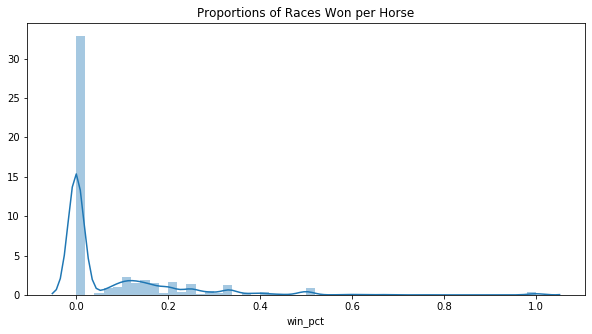

In [100]:
plt.figure(figsize=(10, 5))
plt.title('Proportions of Races Won per Horse')
sns.distplot(winners.win_pct)
plt.show()

In [106]:
f"{winners.win_pct.value_counts()[0]} haven't won"

"3986 haven't won"

There are 6,064 horses in the dataset and 3,986 haven't won - so actually this dataset isn't an imbalanced as I might have thought.

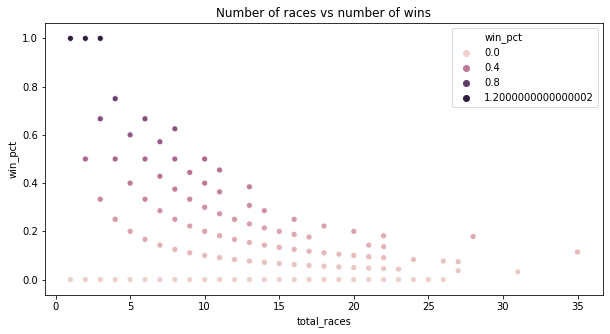

In [156]:
plt.figure(figsize=(10, 5))
plt.title('Number of races vs number of wins')
sns.scatterplot(x='total_races', y='win_pct', data=winners, hue='win_pct')
plt.show()

Horses with a 100% track record have raced very few times.

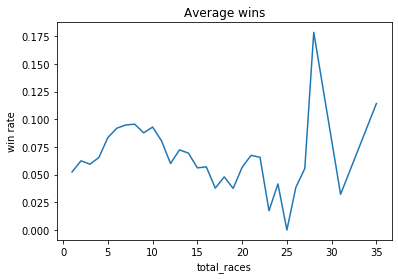

In [158]:
plt.title('Average wins')
plt.plot(winners.groupby('total_races').mean()['win_pct'])
plt.xlabel('total_races')
plt.ylabel('win rate')
plt.show()

There's a trade-off between experience and maturity;  It looks like horses running between 5 and 10 races have proportionately more wins.  

Capturing the horse's prior form will be advantageous to modelling.

### How large is the field in each race?

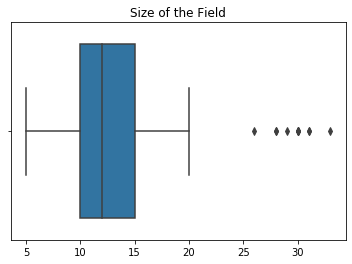

In [166]:
sns.boxplot(df.groupby('RaceID').agg({'HorseID': 'count'}))
plt.title('Size of the Field')
plt.show()

On average there are around 12 horses per race, and the IQR is 5 and 20 and there are some exceptions with more than 25 horses racing.

## Data Prep   
From here I am processing the data for modelling and continue to explore distributions etc...

### Nulls

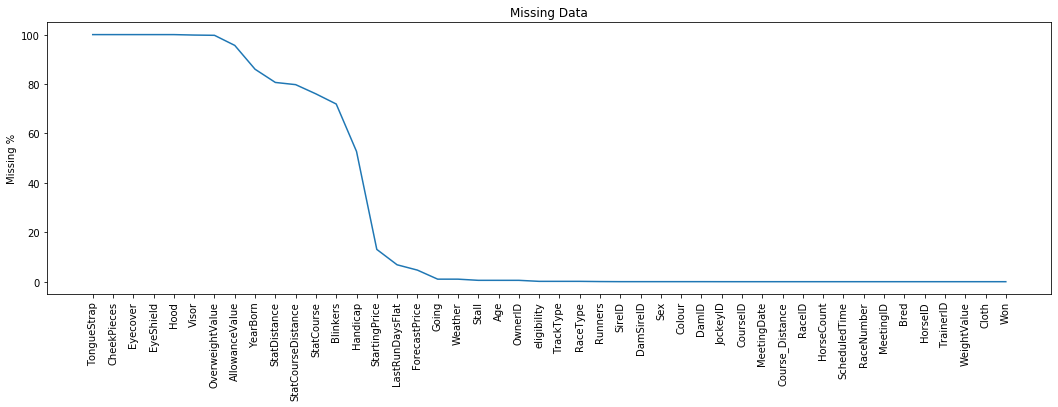

In [10]:
missings = (pd.DataFrame(index=df.isnull().sum().index,
                         data=df.isnull().sum().values / len(df) * 100,
                         columns=['missing_pct'])
            .sort_values(by='missing_pct', ascending=False))

plt.figure(figsize=(18, 5))
plt.plot(missings)
plt.title('Missing Data')
plt.ylabel('Missing %')
plt.xticks(rotation=90)
plt.show()

In [11]:
high_missing = missings[missings.missing_pct > 60]
high_missing

,missing_pct
TongueStrap,100.0000
CheekPieces,100.0000
Eyecover,100.0000
EyeShield,100.0000
Hood,100.0000
Visor,99.8153
OverweightValue,99.7121
AllowanceValue,95.6300
YearBorn,85.9855
StatDistance,80.6404


Some variables either don't contain any information or have too much missing data to infer a meaningful value.  I will record these and remove from model training. 

In [12]:
# record these cols to remove from a modelling dset.
cols_to_remove = list(high_missing.index.values)

In [13]:
# handicap has a lot of nulls, so taking a look to see how to deal with nulls
print(df.Handicap.value_counts(dropna=False))

# will replaces nulls with zero...
df['Handicap'] = df['Handicap'].fillna(0)

nan       19413
1.0000    17347
0.0000       59
Name: Handicap, dtype: int64


## Correct prices  
The prices look like odds and will be super useful for modelling!  They have been corrupted and some values are stored as date strings, so I will correct them

In [67]:
prices = [col for col in df.columns if 'price' in col.lower()]

df[prices].head()

,ForecastPrice,StartingPrice,forecast_price_cleaned,starting_price_cleaned,price_chg
0,16-Jan,12-Jan,16.0000,12.0000,0.7500
1,20-Jan,40/1,20.0000,40.0000,2.0000
2,10-Jan,NaN,10.0000,5.5000,0.5500
3,07-Apr,11-Oct,1.7500,1.1000,0.6286
4,08-Jan,NaN,8.0000,5.5000,0.6875


In [15]:
# create a month dictionary to convert strings to number...
cal_dict = dict(enumerate(cal.month_abbr))

# flip dictionary keys and values round the right way for mapping.
cal_dict = {v: k for (k, v) in cal_dict.items()}


def correct_odds(col: str, split_char: str) -> pd.Series:
    """Convert price column from corrupted fractional odds to a decimal.
    Parameters
    ----------
    col: str
        name of column containing prices to correct
    split_char: str
        the character used to split the column
    Returns
    -------
    A pandas series containing the decimal odds.
    """
    has_char = df[col].str.contains(split_char)

    split_vals = (df[col]
                  [has_char.fillna(False)]
                  .str.split(split_char))

    numer, denom = split_vals.str[0], split_vals.str[1]

    try:
        numer, denom = numer.astype(int), denom.astype(int)
    except ValueError:
        numer = (numer
                 .replace('Aug', '8')
                 .replace('', 1)
                 .astype(int))

        denom = pd.Series([int(x)
                           if x.isnumeric()
                           else cal_dict[x]
                           for x in denom])
        denom.index = numer.index

    return numer / denom


# apply the function above to the two price columns and fix both "-" and "/"
corrected = {}
for col, char in [(col, char) for col in prices for char in ['-', '/']]:
    print(col, char)
    corrected[f'{col}{char}'] = correct_odds(col, char)

ForecastPrice -
ForecastPrice /
StartingPrice -
StartingPrice /


### Fill ForecastPrice

In [16]:
# update dataframe
df['forecast_price_cleaned'] = pd.concat([corrected['ForecastPrice-'],
                                          corrected['ForecastPrice/']])
df['forecast_price_cleaned'] = (df['forecast_price_cleaned']
                                .fillna(df['ForecastPrice']))

In [17]:
df['forecast_price_cleaned'].describe()

count   35092.0000
mean       14.7389
std        13.4107
min         0.2000
25%         6.0000
50%        10.0000
75%        20.0000
max       100.0000
Name: forecast_price_cleaned, dtype: float64

In [19]:
# filling nulls with the 25th percentile - feel that replacing with null is too favourable!
pctl = np.nanpercentile(df['forecast_price_cleaned'], q=25)
df['forecast_price_cleaned'] = df['forecast_price_cleaned'].fillna(pctl)

1:80: E501 line too long (91 > 79 characters)


In [20]:
df[['ForecastPrice', 'forecast_price_cleaned']].head()

,ForecastPrice,forecast_price_cleaned
0,16-Jan,16.0000
1,20-Jan,20.0000
2,10-Jan,10.0000
3,07-Apr,1.7500
4,08-Jan,8.0000


### Fill StartingPrice

In [21]:
# update dataframe
df['starting_price_cleaned'] = pd.concat([corrected['StartingPrice-'],
                                          corrected['StartingPrice/']])
df['starting_price_cleaned'] = (df['starting_price_cleaned']
                                .fillna(df['StartingPrice']))

In [22]:
df['starting_price_cleaned'].describe()

count   32009.0000
mean       20.6992
std        22.7877
min         0.1111
25%         5.5000
50%        12.0000
75%        28.0000
max       150.0000
Name: starting_price_cleaned, dtype: float64

In [24]:
# filling nulls with the 25th percentile - feel that replacing with null is too favourable!
pctl = np.nanpercentile(df['starting_price_cleaned'], q=25)
df['starting_price_cleaned'] = df['starting_price_cleaned'].fillna(pctl)

1:80: E501 line too long (91 > 79 characters)


In [25]:
df[['StartingPrice', 'starting_price_cleaned']].head()

,StartingPrice,starting_price_cleaned
0,12-Jan,12.0000
1,40/1,40.0000
2,NaN,5.5000
3,11-Oct,1.1000
4,NaN,5.5000


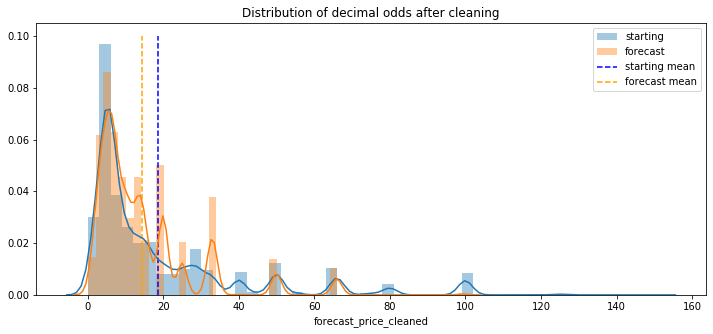

In [173]:
plt.figure(figsize=(12, 5))
plt.title('Distribution of decimal odds after cleaning')
sns.distplot(df['starting_price_cleaned'], label='starting')
plt.vlines(df['starting_price_cleaned'].mean(),
           ymin=0, ymax=0.1, colors='b',
           linestyles='--', label='starting mean')

sns.distplot(df['forecast_price_cleaned'], label='forecast')
plt.vlines(df['forecast_price_cleaned'].mean(),
           ymin=0, ymax=0.1, colors='orange',
           linestyles='--', label='forecast mean')
plt.legend()
plt.show()

On average the return increases closer to the race.

In [ ]:
cols_to_remove.extend(prices)

Below I have created a variable that tracks the change in price.  I've assumed that `forecast` is a pre-race value, whilst `starting price` is an updated value at the point of the race starting.

In [28]:
df['price_chg'] = df['starting_price_cleaned'] / df['forecast_price_cleaned']

In [174]:
df['price_chg'].head()

0   0.7500
1   2.0000
2   0.5500
3   0.6286
4   0.6875
Name: price_chg, dtype: float64

If the price change is less than 1, the return has reduced, which means that the odds of winning have increased.

## CONT HERE
## <font color=red>TODO: </font>  
* Correct the prices/ odds- DONE  
* Create some competition variables, so that the interaction between horse and relative position amonst a field of horses is captured.  
* Plot frequency of races over time or something, group by `won`  
* Calculate the difference in odds - increasing/ declining might be quite predictive.  
* Capture stats on the horses previous performance (time since last race, finish position last race and mean - I think I can use lag function)
* Take softmax of the prediction across horses in the race? Otherwise you migth predict several winners in one race!  
* Comment on loss function, optimising for the whole race - i.e. should we train on mini-batches containing input of one race at a time?  Could I create a loss function that instead of being a binary classifier, understands there's only one winner and therefore all others must be losers...

## Taking a look at the ID variables, are these discrete values useful?

In [29]:
# grabbing discrete ID vars
id_cols = [col for col in df.columns if 'id' in col.lower()]
id_cols

['RaceID',
 'HorseID',
 'JockeyID',
 'TrainerID',
 'OwnerID',
 'DamID',
 'SireID',
 'DamSireID',
 'MeetingID',
 'CourseID']

In [30]:
# cardinality
for col in id_cols:
    print(f"""{col}: {len(df[col].unique())}""")

RaceID: 3000
HorseID: 6064
JockeyID: 249
TrainerID: 160
OwnerID: 3078
DamID: 4182
SireID: 297
DamSireID: 734
MeetingID: 344
CourseID: 8


There are 3,000 races, a total of 6,000 participating horses... 

In [74]:
# are there as many winners as there are races?
df.Won.sum()

2907

There isn't a winner for each race! Assuming the RaceID denotes a unique race.

In [81]:
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Hood,Visor,EyeShield,Eyecover,TongueStrap,CheekPieces,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,...,Weather_Fine but Cloudy,Weather_Overcast,Weather_Raining,Weather_Sunny,Weather_Sunny & Warm,Weather_Sunny & Windy,Weather_Sunny Intervals,Weather_Unsettled,Going_Good,Going_Good to Firm,Going_Good to Soft,Going_Heavy,Going_Soft,Going_Soft (Heavy in places),Going_Standard,Sex_c,Sex_f,Sex_g,Sex_h,Sex_m,TrackType_Polytrack,TrackType_Sand,TrackType_Turf
0,989418,2963489,7,5.0000,132,1398052.0000,nan,nan,1198534,1289143.0000,26.0000,3.0000,nan,nan,nan,nan,nan,nan,nan,16-Jan,nan,nan,nan,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,989418,2972665,13,6.0000,132,1165412.0000,nan,nan,1188128,1140080.0000,nan,3.0000,nan,nan,nan,nan,nan,nan,nan,20-Jan,nan,nan,nan,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,989418,2972662,9,7.0000,132,1239852.0000,nan,nan,1199122,1448576.0000,nan,3.0000,nan,nan,nan,nan,nan,nan,nan,10-Jan,nan,nan,nan,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,989418,2960365,1,12.0000,132,1417524.0000,nan,nan,1049637,1487690.0000,33.0000,3.0000,nan,nan,nan,nan,nan,nan,nan,07-Apr,nan,nan,nan,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,989418,2968596,11,8.0000,132,1354773.0000,nan,nan,1140041,1403676.0000,24.0000,3.0000,nan,nan,nan,nan,nan,nan,nan,08-Jan,nan,nan,nan,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [34]:
df.drop(columns=cols_to_remove).head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,Bred,DamID,SireID,DamSireID,Sex,Colour,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won,forecast_price_cleaned,starting_price_cleaned,price_chg
0,989418,2963489,7,5.0000,132,1398052.0000,1198534,1289143.0000,26.0000,3.0000,SAF,2803520.0000,2004880.0000,2179351.0000,f,b,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,0.0000,2YO only,380,02/05/2017,0,16.0000,12.0000,0.7500
1,989418,2972665,13,6.0000,132,1165412.0000,1188128,1140080.0000,nan,3.0000,SAF,2749301.0000,2960049.0000,2001540.0000,f,b,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,0.0000,2YO only,380,02/05/2017,0,20.0000,40.0000,2.0000
2,989418,2972662,9,7.0000,132,1239852.0000,1199122,1448576.0000,nan,3.0000,SAF,2761722.0000,2441786.0000,2123459.0000,f,b,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,0.0000,2YO only,380,02/05/2017,0,10.0000,5.5000,0.5500
3,989418,2960365,1,12.0000,132,1417524.0000,1049637,1487690.0000,33.0000,3.0000,SAF,2347111.0000,2170013.0000,2071137.0000,f,b,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,0.0000,2YO only,380,02/05/2017,1,1.7500,1.1000,0.6286
4,989418,2968596,11,8.0000,132,1354773.0000,1140041,1403676.0000,24.0000,3.0000,SAF,2618721.0000,2410998.0000,2170115.0000,f,b,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,0.0000,2YO only,380,02/05/2017,0,8.0000,5.5000,0.6875


In [30]:
# let's convert the ID's to string as they're discrete and going probably not 
df[id_cols].astype(str)

,RaceID,HorseID,JockeyID,TrainerID,OwnerID,DamID,SireID,DamSireID,MeetingID,CourseID
0,989418,2963489,1398052.0,1198534,1289143.0,2803520.0,2004880.0,2179351.0,87048,380
1,989418,2972665,1165412.0,1188128,1140080.0,2749301.0,2960049.0,2001540.0,87048,380
2,989418,2972662,1239852.0,1199122,1448576.0,2761722.0,2441786.0,2123459.0,87048,380
3,989418,2960365,1417524.0,1049637,1487690.0,2347111.0,2170013.0,2071137.0,87048,380
4,989418,2968596,1354773.0,1140041,1403676.0,2618721.0,2410998.0,2170115.0,87048,380
...,...,...,...,...,...,...,...,...,...,...
36814,1028128,2980319,1165412.0,1079200,1492946.0,2626929.0,2005847.0,2167985.0,91584,325
36815,1028128,2985033,1079281.0,1403297,1494400.0,2632498.0,2058573.0,2000564.0,91584,325
36816,1028128,2977403,1440495.0,1079200,1482459.0,2653726.0,2854936.0,2264809.0,91584,325
36817,1028128,2978297,1288634.0,1079234,1492370.0,2736480.0,2699207.0,2705498.0,91584,325


## Categorical variables...  
Are they all IDs? Should I one-hot encode?

In [44]:
cats = df.select_dtypes('object').columns

# ignore the columns I'll be removing
cats = list(set(cats).difference(cols_to_remove))

In [45]:
df[cats].head()

,eligibility,ScheduledTime,Colour,Bred,Weather,RaceType,Going,Sex,TrackType,MeetingDate
0,2YO only,##########,b,SAF,Cloudy,Flat,Good,f,Turf,02/05/2017
1,2YO only,##########,b,SAF,Cloudy,Flat,Good,f,Turf,02/05/2017
2,2YO only,##########,b,SAF,Cloudy,Flat,Good,f,Turf,02/05/2017
3,2YO only,##########,b,SAF,Cloudy,Flat,Good,f,Turf,02/05/2017
4,2YO only,##########,b,SAF,Cloudy,Flat,Good,f,Turf,02/05/2017


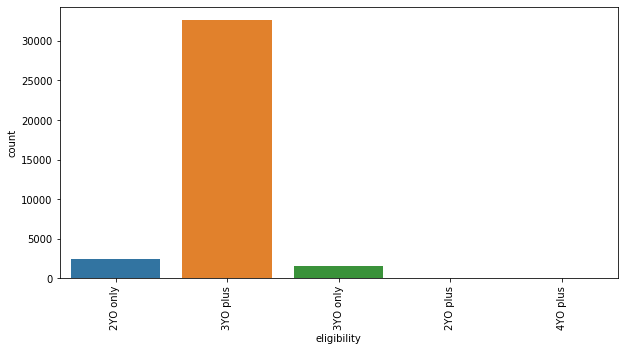

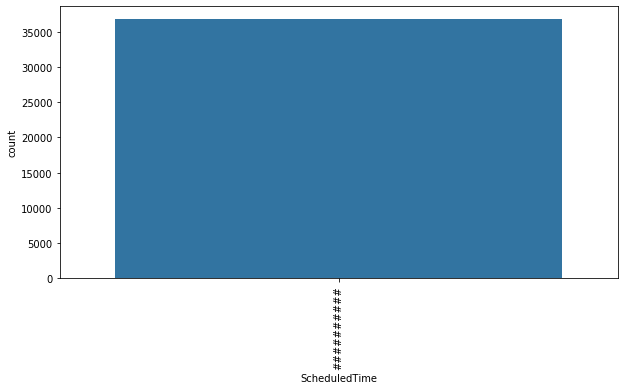

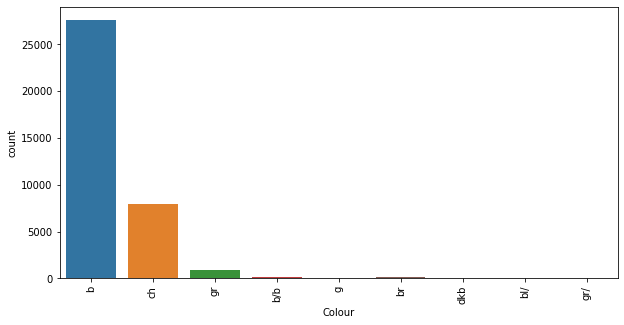

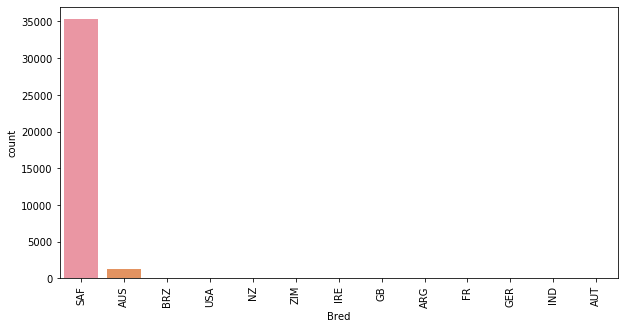

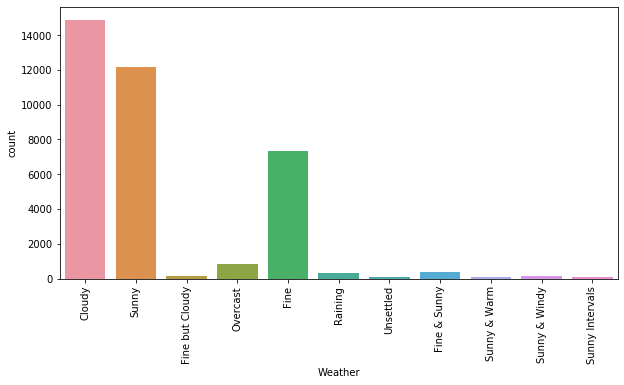

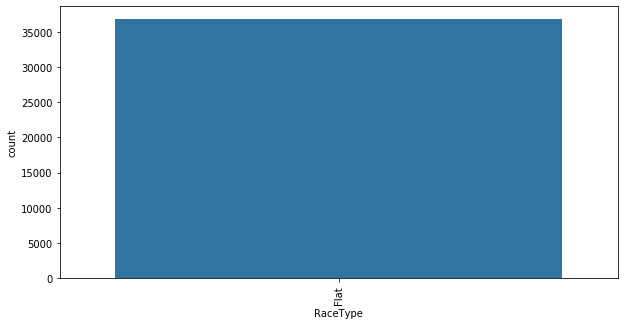

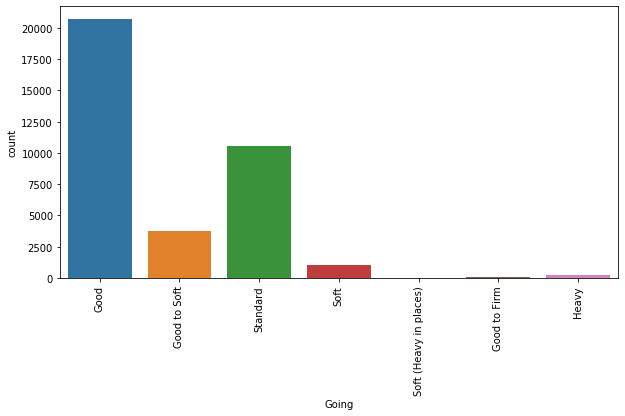

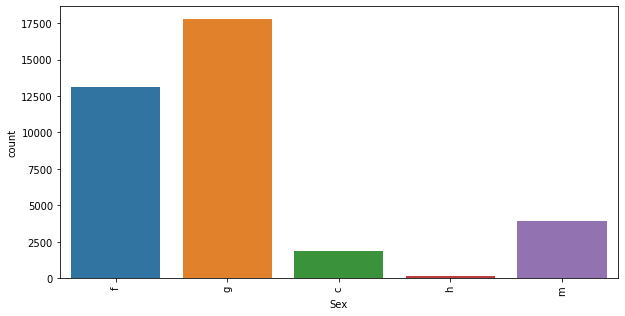

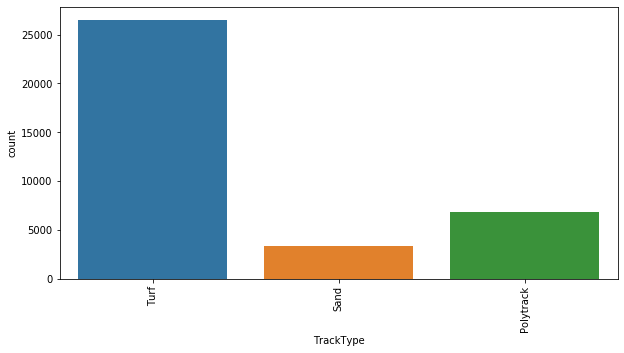

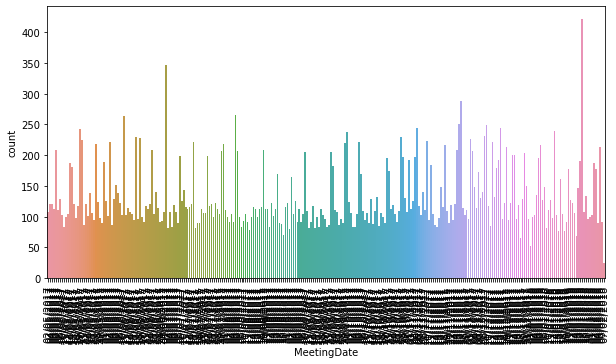

In [47]:
for c in cats:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=c, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [48]:
cols_to_remove.extend(['RaceType',  # all flat races
                       'ScheduledTime',  # corrupted date
                      ])

1:35: E261 at least two spaces before inline comment
3:23: E124 closing bracket does not match visual indentation


### Create dummy variables

In [60]:
for c in ['RaceType', 'MeetingDate', 'ScheduledTime']:
    cats.remove(c)

In [61]:
cats

['eligibility', 'Colour', 'Bred', 'Weather', 'Going', 'Sex', 'TrackType']

In [62]:
for c in cats:
    df = df.merge(pd.get_dummies(df[c], prefix=c), left_index=True, right_index=True)

2:80: E501 line too long (85 > 79 characters)


In [64]:
cols_to_remove.extend(cats)

In [66]:
df.drop(columns=cols_to_remove).head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,TrainerID,OwnerID,LastRunDaysFlat,Age,DamID,SireID,DamSireID,MeetingID,RaceNumber,HorseCount,Runners,Course_Distance,Handicap,CourseID,MeetingDate,Won,forecast_price_cleaned,...,Weather_Fine but Cloudy,Weather_Overcast,Weather_Raining,Weather_Sunny,Weather_Sunny & Warm,Weather_Sunny & Windy,Weather_Sunny Intervals,Weather_Unsettled,Going_Good,Going_Good to Firm,Going_Good to Soft,Going_Heavy,Going_Soft,Going_Soft (Heavy in places),Going_Standard,Sex_c,Sex_f,Sex_g,Sex_h,Sex_m,TrackType_Polytrack,TrackType_Sand,TrackType_Turf
0,989418,2963489,7,5.0000,132,1398052.0000,1198534,1289143.0000,26.0000,3.0000,2803520.0000,2004880.0000,2179351.0000,87048,1,13,11.0000,1312,0.0000,380,02/05/2017,0,16.0000,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,989418,2972665,13,6.0000,132,1165412.0000,1188128,1140080.0000,nan,3.0000,2749301.0000,2960049.0000,2001540.0000,87048,1,13,11.0000,1312,0.0000,380,02/05/2017,0,20.0000,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,989418,2972662,9,7.0000,132,1239852.0000,1199122,1448576.0000,nan,3.0000,2761722.0000,2441786.0000,2123459.0000,87048,1,13,11.0000,1312,0.0000,380,02/05/2017,0,10.0000,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,989418,2960365,1,12.0000,132,1417524.0000,1049637,1487690.0000,33.0000,3.0000,2347111.0000,2170013.0000,2071137.0000,87048,1,13,11.0000,1312,0.0000,380,02/05/2017,1,1.7500,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,989418,2968596,11,8.0000,132,1354773.0000,1140041,1403676.0000,24.0000,3.0000,2618721.0000,2410998.0000,2170115.0000,87048,1,13,11.0000,1312,0.0000,380,02/05/2017,0,8.0000,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [49]:
# convert meeting date to a datetime
print(df.MeetingDate.dtype)  

# TBC

dtype('O')

### Create some variables to describe the horses previous form

## Visualise Continous Variables

In [ ]:
df

In [ ]:
# TODO pairs plot?

## Task 2 Modelling:  
(45 Minutes Max)

1) Build a model (or models) to predict the winner.  
2) Evaluate your model(s) performance and briefly detail any methods or logic you are using to do so.

**Modelling assumptions...**  
* that I am predicting the outcome of a past event and that the Forecast and Starting Price are both available and not leaking infortmation.  

In [109]:
y = df['Won']

In [111]:
y.value_counts()

0    33912
1     2907
Name: Won, dtype: int64

In [ ]:
X = df.drop(columns=cols_to_drop)

## Other considerations, with more time... 
* Really need to capture the horses form. Converting the MeetingDate to a datetime value we can use lag functions to capture prior statistics relating to the horses form, characteristics about the race tracks the horse has won at etc. 
* bayesian probability - the probability of winning given prior knowledge of A) the horses form and B) the changing odds.  
* Need to consider the structure of this data... training on all horses doesn't seem right... EXPAND ON THIS.